In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [16]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [18]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
# reflect an existing database into a new model
Base= automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables

In [20]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [21]:
# Save references to each table
Measure = Base.classes.measurement
Station= Base.classes.station

In [22]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [23]:
# display imput from Measure
first_row= session.query(Measure).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x203f83d5f10>,
 'prcp': 0.08,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0,
 'station': 'USC00519397'}

In [24]:
# display imput from Station
first_row= session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x203f83e3730>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

Query Date:  2016-08-23


Text(0, 0.5, 'Inches')

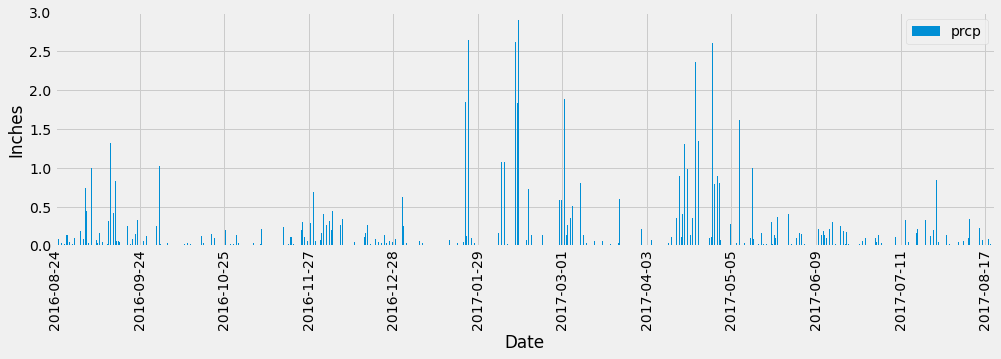

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

date = dt.datetime(2016,8,23)
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

results=session.query(Measure.tobs,Measure.date,Measure.id, Measure.prcp,Measure.station).\
                        filter(Measure.date > date).order_by(Measure.date).all()
# greater= list(np.ravel(results))
# greater

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(results, columns=['tobs', 'date', 'id','prcp','station'])
df.set_index('date', inplace=True, )

df.head()
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
df_2=pd.DataFrame(results, columns=['tobs', 'date', 'id','prcp','station'])
df_chart=df_2[['date','prcp']]
df_chart

df_graph=df_chart.plot(kind='bar', figsize=(15,4))
pos = np.arange(len(df_chart['prcp']))
ticks=plt.xticks(pos[::200], df_chart['date'].values[::200], rotation=90)
plt.ylim(0,3)
plt.xlabel('Date')
plt.ylabel('Inches')

In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df[['tobs','prcp']].describe()

,tobs,prcp
count,2223.000000,2015.000000
mean,74.578947,0.176462
std,4.612232,0.460288
min,58.000000,0.000000
25%,71.000000,0.000000
50%,75.000000,0.020000
75%,78.000000,0.130000
max,87.000000,6.700000


In [27]:
# Design a query to show how many stations are available in this dataset?
# df['station'].unique()
session.query(Measure.station).distinct().count()
#      print(value)

9

In [28]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stat=session.query(Measure.station,Measure.tobs,Measure.date).all()
stat_df = pd.DataFrame(stat, columns=['station','tobs','date'])
stat_count=stat_df.groupby(stat_df['station']).count()
stat_count

,tobs,date
station,,
USC00511918,1979,1979
USC00513117,2709,2709
USC00514830,2202,2202
USC00516128,2612,2612
USC00517948,1372,1372
USC00518838,511,511
USC00519281,2772,2772
USC00519397,2724,2724
USC00519523,2669,2669


In [29]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
great_stat=stat_df[stat_df['station']=='USC00511918']
print(f" Max temp of station USC00511918 is {great_stat['tobs'].max()}")
print(f" Min temp of station USC00511918 is {great_stat['tobs'].min()}")
print(f" Avg temp of station USC00511918 is {great_stat['tobs'].mean()}")

 Max temp of station USC00511918 is 87.0
 Min temp of station USC00511918 is 53.0
 Avg temp of station USC00511918 is 71.61596766043456


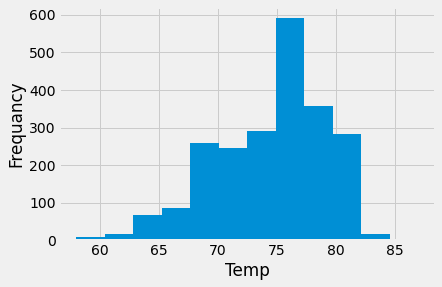

In [30]:
# Choose the station with the highest number of temperature observations.
# tobs_count=stat_df.dropna()
# tobs_count #this shows that temps were recorded in all of the stations in all instances
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Pop_stat_temps=session.query(Measure.tobs,Measure.station,Measure.date).\
                        filter(Measure.date > date).all()
Pop_stat_temps
pop_stat_df = pd.DataFrame(Pop_stat_temps, columns=['Temps','Station','Date'])
pop_stat_df

x = pop_stat_df['Temps']
plt.hist(x, bins=12)
plt.xlabel('Temp')
plt.ylabel('Frequancy')
plt.show()

In [31]:
#dataframe for json data needed
json=pd.DataFrame(results, columns=['tobs', 'date', 'id','prcp','station'])
json_df=json[['tobs', 'date','prcp']]
json_df

,tobs,date,prcp
0,79.0,2016-08-24,0.08
1,76.0,2016-08-24,2.15
2,80.0,2016-08-24,2.28
3,78.0,2016-08-24,NaN
4,79.0,2016-08-24,1.22
...,...,...,...
2218,76.0,2017-08-22,0.50
2219,81.0,2017-08-23,0.00
2220,82.0,2017-08-23,0.00
2221,82.0,2017-08-23,0.08


In [32]:
#referance of query results
results

[(79.0, '2016-08-24', 2365, 0.08, 'USC00519397'),
 (76.0, '2016-08-24', 5092, 2.15, 'USC00513117'),
 (80.0, '2016-08-24', 7332, 2.28, 'USC00514830'),
 (78.0, '2016-08-24', 8826, None, 'USC00517948'),
 (79.0, '2016-08-24', 11852, 1.22, 'USC00519523'),
 (77.0, '2016-08-24', 14609, 2.15, 'USC00519281'),
 (74.0, '2016-08-24', 19203, 1.45, 'USC00516128'),
 (80.0, '2016-08-25', 2366, 0.08, 'USC00519397'),
 (77.0, '2016-08-25', 5093, 0.08, 'USC00513117'),
 (81.0, '2016-08-25', 7333, 0.0, 'USC00514830'),
 (81.0, '2016-08-25', 8827, 0.0, 'USC00517948'),
 (80.0, '2016-08-25', 11853, 0.21, 'USC00519523'),
 (80.0, '2016-08-25', 14610, 0.06, 'USC00519281'),
 (77.0, '2016-08-25', 19204, 0.11, 'USC00516128'),
 (79.0, '2016-08-26', 2367, 0.0, 'USC00519397'),
 (78.0, '2016-08-26', 5094, 0.03, 'USC00513117'),
 (81.0, '2016-08-26', 7334, 0.02, 'USC00514830'),
 (81.0, '2016-08-26', 8828, 0.04, 'USC00517948'),
 (84.0, '2016-08-26', 11854, 0.0, 'USC00519523'),
 (80.0, '2016-08-26', 14611, 0.01, 'USC00519281

In [33]:
#convert query results into a list of dics
json_list=[]
for each_row in results:
    one_result={}
    one_result['tobs']=each_row[0]
    one_result['date']=each_row[1]
    one_result['prcp']=each_row[3]
    one_result['station']=each_row[4]
    json_list.append(one_result)
    
json_list


[{'tobs': 79.0, 'date': '2016-08-24', 'prcp': 0.08, 'station': 'USC00519397'},
 {'tobs': 76.0, 'date': '2016-08-24', 'prcp': 2.15, 'station': 'USC00513117'},
 {'tobs': 80.0, 'date': '2016-08-24', 'prcp': 2.28, 'station': 'USC00514830'},
 {'tobs': 78.0, 'date': '2016-08-24', 'prcp': None, 'station': 'USC00517948'},
 {'tobs': 79.0, 'date': '2016-08-24', 'prcp': 1.22, 'station': 'USC00519523'},
 {'tobs': 77.0, 'date': '2016-08-24', 'prcp': 2.15, 'station': 'USC00519281'},
 {'tobs': 74.0, 'date': '2016-08-24', 'prcp': 1.45, 'station': 'USC00516128'},
 {'tobs': 80.0, 'date': '2016-08-25', 'prcp': 0.08, 'station': 'USC00519397'},
 {'tobs': 77.0, 'date': '2016-08-25', 'prcp': 0.08, 'station': 'USC00513117'},
 {'tobs': 81.0, 'date': '2016-08-25', 'prcp': 0.0, 'station': 'USC00514830'},
 {'tobs': 81.0, 'date': '2016-08-25', 'prcp': 0.0, 'station': 'USC00517948'},
 {'tobs': 80.0, 'date': '2016-08-25', 'prcp': 0.21, 'station': 'USC00519523'},
 {'tobs': 80.0, 'date': '2016-08-25', 'prcp': 0.06, 's

In [34]:
import json
with open('outputfile', 'w') as fout:
    json.dump(json_list, fout)

In [35]:
results1 = session.query(Measure.date,Measure.prcp).all()

# session.close()

    # Convert the query results to a dictionary using date as the key and prcp as the value.
precip=[]
for date, prcp in results1:
    one_result={date: prcp}
    precip.append(one_result)
precip
# results1[1]

[{'2010-01-01': 0.08},
 {'2010-01-02': 0.0},
 {'2010-01-03': 0.0},
 {'2010-01-04': 0.0},
 {'2010-01-06': None},
 {'2010-01-07': 0.06},
 {'2010-01-08': 0.0},
 {'2010-01-09': 0.0},
 {'2010-01-10': 0.0},
 {'2010-01-11': 0.01},
 {'2010-01-12': 0.0},
 {'2010-01-14': 0.0},
 {'2010-01-15': 0.0},
 {'2010-01-16': 0.0},
 {'2010-01-17': 0.0},
 {'2010-01-18': 0.0},
 {'2010-01-19': 0.0},
 {'2010-01-20': 0.0},
 {'2010-01-21': 0.0},
 {'2010-01-22': 0.0},
 {'2010-01-23': 0.0},
 {'2010-01-24': 0.01},
 {'2010-01-25': 0.0},
 {'2010-01-26': 0.04},
 {'2010-01-27': 0.12},
 {'2010-01-28': 0.0},
 {'2010-01-30': None},
 {'2010-01-31': 0.03},
 {'2010-02-01': 0.01},
 {'2010-02-03': None},
 {'2010-02-04': 0.01},
 {'2010-02-05': 0.0},
 {'2010-02-06': 0.0},
 {'2010-02-07': 0.0},
 {'2010-02-08': 0.0},
 {'2010-02-09': 0.0},
 {'2010-02-11': 0.0},
 {'2010-02-12': 0.02},
 {'2010-02-13': 0.01},
 {'2010-02-14': 0.0},
 {'2010-02-15': 0.0},
 {'2010-02-16': 0.0},
 {'2010-02-17': 0.0},
 {'2010-02-19': None},
 {'2010-02-20': 0

In [36]:
#convert query results into a list of dics
results1 = session.query(Measure.date,Measure.prcp).\
        filter(Measure.date > '2016-8-23').all()
precip=[]
for date, prcp in results1:
    one_result={date:prcp}
    precip.append(one_result)
precip

[{'2017-01-01': 0.0},
 {'2017-01-02': 0.0},
 {'2017-01-03': 0.0},
 {'2017-01-04': 0.0},
 {'2017-01-05': 0.0},
 {'2017-01-06': 0.0},
 {'2017-01-07': 0.0},
 {'2017-01-08': 0.0},
 {'2017-01-09': 0.0},
 {'2017-01-10': 0.0},
 {'2017-01-11': 0.0},
 {'2017-01-12': 0.0},
 {'2017-01-13': 0.0},
 {'2017-01-14': 0.0},
 {'2017-01-15': 0.0},
 {'2017-01-16': 0.0},
 {'2017-01-17': 0.0},
 {'2017-01-18': 0.0},
 {'2017-01-19': 0.0},
 {'2017-01-20': 0.0},
 {'2017-01-21': 0.0},
 {'2017-01-22': 0.16},
 {'2017-01-23': 0.0},
 {'2017-01-24': 0.04},
 {'2017-01-25': 0.03},
 {'2017-01-26': 0.0},
 {'2017-01-27': 0.0},
 {'2017-01-28': 0.0},
 {'2017-01-29': 0.18},
 {'2017-01-30': 0.0},
 {'2017-01-31': 0.0},
 {'2017-02-01': 0.0},
 {'2017-02-02': 0.0},
 {'2017-02-03': 0.0},
 {'2017-02-04': 0.0},
 {'2017-02-05': 0.0},
 {'2017-02-06': 0.0},
 {'2017-02-07': 0.51},
 {'2017-02-08': 0.0},
 {'2017-02-09': 0.0},
 {'2017-02-10': 0.0},
 {'2017-02-11': 0.31},
 {'2017-02-12': 2.62},
 {'2017-02-13': 0.01},
 {'2017-02-14': 0.0},
 {

In [37]:
# finds the most common station in the past year
results2 = session.query(Measure.station,Measure.date,Measure.tobs).\
        filter(Measure.date > '2016-8-23').all()
result_df=pd.DataFrame(results2, columns=['station','date','tobs'])
result_2=result_df.groupby(result_df['station']).count()
result_2

,date,tobs
station,,
USC00513117,212,212
USC00514830,195,195
USC00516128,222,222
USC00517948,107,107
USC00519281,221,221
USC00519397,230,230
USC00519523,210,210


In [38]:
#produces a data frame of the most active stations
result = session.query(Measure.station,Measure.date,Measure.tobs).all()
result_df = pd.DataFrame(result, columns=['station','date','tobs'])
result_count=result_df.groupby(result_df['station']).count()
result_count        


,date,tobs
station,,
USC00511918,1979,1979
USC00513117,2709,2709
USC00514830,2202,2202
USC00516128,2612,2612
USC00517948,1372,1372
USC00518838,511,511
USC00519281,2772,2772
USC00519397,2724,2724
USC00519523,2669,2669


In [39]:
# Converts results into a laist of dics
results2 = session.query(Measure.station,Measure.date,Measure.tobs).\
        filter(Measure.station == 'USC00513117').\
        filter(Measure.date > '2016-8-23').all() 

#     session.close()

    # Convert the query results to a dictionary using date as the key and prcp as the value.
stat_temp=[]
for each_row in results2:
        one_result={}
        one_result['station']= each_row[0]
        one_result['date']=each_row[1]
        one_result['tobs']=each_row[2]
        stat_temp.append(one_result)

stat_temp

[{'station': 'USC00513117', 'date': '2017-01-01', 'tobs': 66.0},
 {'station': 'USC00513117', 'date': '2017-01-02', 'tobs': 66.0},
 {'station': 'USC00513117', 'date': '2017-01-03', 'tobs': 65.0},
 {'station': 'USC00513117', 'date': '2017-01-04', 'tobs': 64.0},
 {'station': 'USC00513117', 'date': '2017-01-05', 'tobs': 65.0},
 {'station': 'USC00513117', 'date': '2017-01-06', 'tobs': 70.0},
 {'station': 'USC00513117', 'date': '2017-01-07', 'tobs': 72.0},
 {'station': 'USC00513117', 'date': '2017-01-08', 'tobs': 62.0},
 {'station': 'USC00513117', 'date': '2017-01-09', 'tobs': 65.0},
 {'station': 'USC00513117', 'date': '2017-01-10', 'tobs': 66.0},
 {'station': 'USC00513117', 'date': '2017-01-11', 'tobs': 66.0},
 {'station': 'USC00513117', 'date': '2017-01-12', 'tobs': 67.0},
 {'station': 'USC00513117', 'date': '2017-01-13', 'tobs': 70.0},
 {'station': 'USC00513117', 'date': '2017-01-14', 'tobs': 66.0},
 {'station': 'USC00513117', 'date': '2017-01-15', 'tobs': 67.0},
 {'station': 'USC00513117

## Bonus Challenge Assignment

In [142]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measure.tobs), func.avg(Measure.tobs), func.max(Measure.tobs)).\
        filter(Measure.date >= start_date).filter(Measure.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
